In [53]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

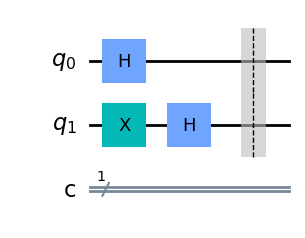

In [54]:
circuit = QuantumCircuit(2,1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output="mpl")


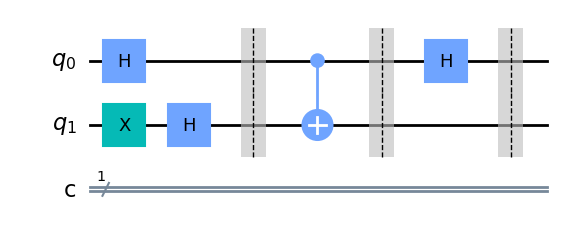

In [55]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output="mpl")


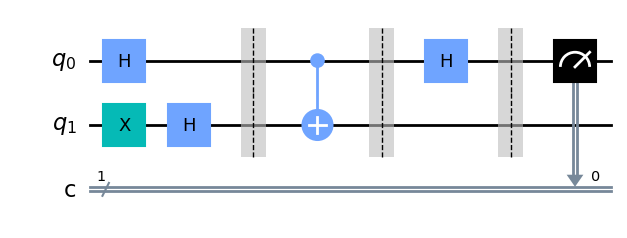

In [56]:
circuit.measure(0,0)
circuit.draw(output="mpl")

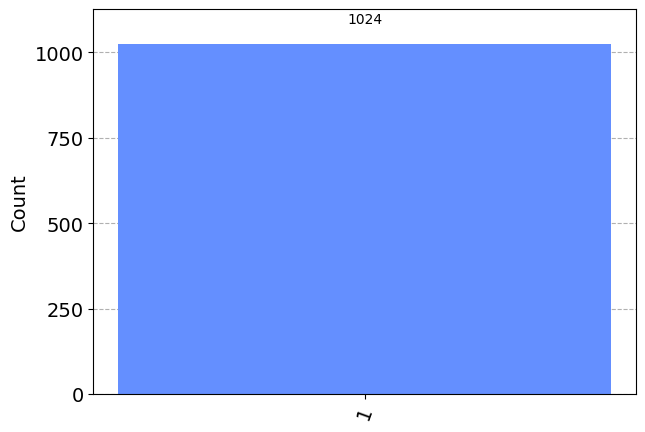

In [57]:
backend = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts(circuit)
plot_histogram([counts])

In [58]:
IBMQ.save_account(open("../ibmapi.txt","r").read(), overwrite=True)
IBMQ.load_account()

Aer.backends()
provider = IBMQ.get_provider("ibm-q")
provider.backends()

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()}: {backend.status().pending_jobs} : {qubit_count}")

ibmqfactory.load_account:WARNING:2023-01-13 12:26:43,111: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator: 3 : simulated
ibmq_lima: 0 : 5
ibmq_belem: 0 : 5
ibmq_quito: 14 : 5
simulator_statevector: 4 : simulated
simulator_mps: 4 : simulated
simulator_extended_stabilizer: 4 : simulated
simulator_stabilizer: 4 : simulated
ibmq_manila: 3 : 5
ibm_nairobi: 55 : 7
ibm_oslo: 22 : 7


In [59]:
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
%qiskit_job_watcher

quantum_computer = provider.get_backend("ibmq_belem")
job = execute(circuit, backend=quantum_computer, shots=1024)
job_monitor(job)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run


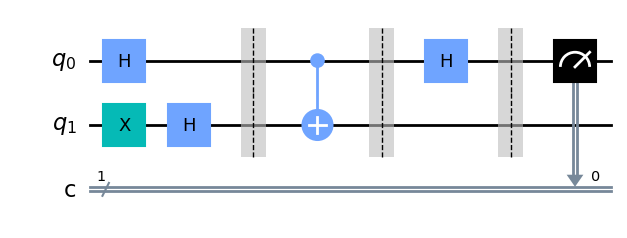

In [60]:
%qiskit_disable_job_watcher
%matplotlib inline
circuit.draw(output="mpl")

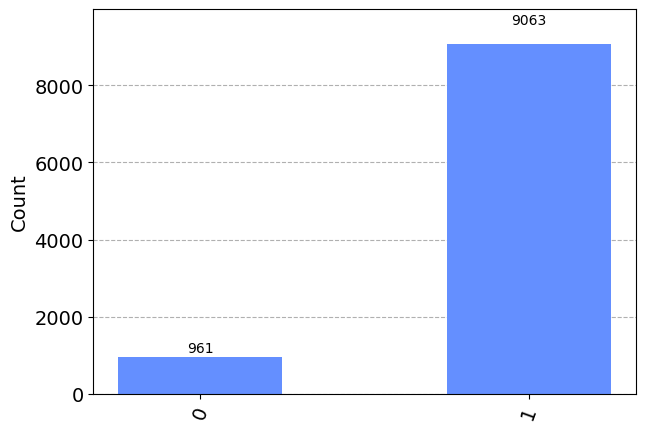

In [61]:
from qiskit.visualization import plot_histogram
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))